## Korrelationen
Zeigt Korrelationen und Ausprägung der Korrelation zwischen Features des Datensets an.

**Imports**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import src.package.importer as imp
import src.package.importer_usages as imp_usg
import src.package.charts as charts
import src.package.consts as c

### Alle Features
Zeigt Korrelationen zwischen allen Variablen / Features auf. (Big Picture)

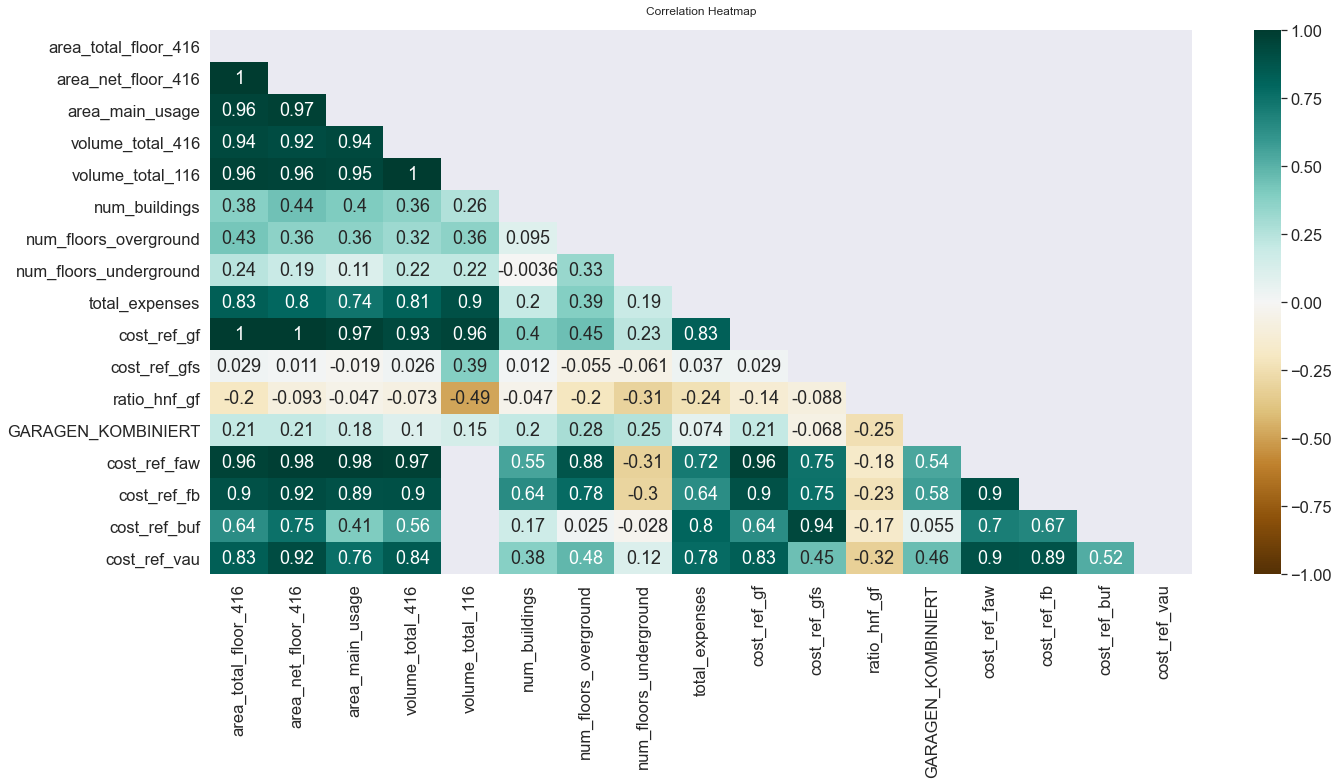

In [2]:
# set preferences
charts.set_preferences(sns, rc=(22, 10), font_scale=1.5)

# import ans preprocess dataset
df = imp.get_extended_dataset('../package/datasets/full_dataset.csv')
df_usg, usage_types = imp_usg.extract_usage_details(df, highest_only=False, combine_garages=True)
additional_features = [c.FIELD_GARAGE_COMBINED, c.FIELD_COST_REF_FAW, c.FIELD_COST_REF_FB, c.FIELD_COST_REF_BUF,
                       c.FIELD_COST_REF_VAU]
filtered_df = imp.select_relevant_features(df_usg, additional_features=additional_features)

charts.correlation_hmp(filtered_df)

### Unabhängige & Abhängige Variablen
Zeigt Korrelation der unabhängigen Variablen mit der abhängigen Variable (HNF-GF Ratio).

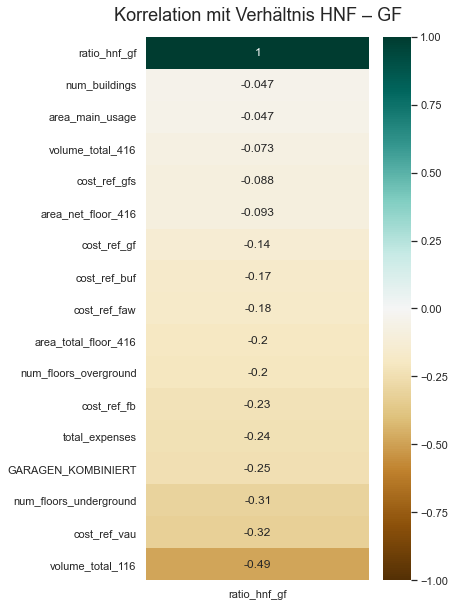

In [8]:
charts.set_preferences(sns, rc=(5, 10))
charts.correlation_ratio(filtered_df)

## Garagen

Hat eine vorhandene Garage eine Korrelation zur HNF-GF Ratio?
Plot zeigt Verteilung des ratios für Gebäude mit und ohne Garage (Indoor).

In [4]:
# preprocess data
filtered_df[c.GARAGE_INDOOR_PRESENT] = filtered_df[c.GARAGE_INDOOR_PRESENT].astype('category')
data = filtered_df[c.FIELD_HNF_GF_RATIO]

# plot data
gf = sns.catplot(x=c.GARAGE_INDOOR_PRESENT, y="ratio_hnf_gf", kind="box", data=filtered_df)
gf.set(xlabel='Garage vorhanden)', ylabel='Ratio HNF - GF')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='normal',
    fontsize='medium'
)

# describe data
data.groupby(filtered_df[c.GARAGE_INDOOR_PRESENT]).count()

AttributeError: module 'src.package.consts' has no attribute 'GARAGE_INDOOR_PRESENT'

In [ ]:
# preprocess data
filtered_df[c.GARAGE_OUTDOOR_PRESENT] = filtered_df[c.GARAGE_OUTDOOR_PRESENT].astype('category')
data = filtered_df[c.FIELD_HNF_GF_RATIO]

# plot data
gf = sns.catplot(x=c.GARAGE_OUTDOOR_PRESENT, y="ratio_hnf_gf", kind="box", data=filtered_df)
gf.set(xlabel='Garage vorhanden)', ylabel='Ratio HNF - GF')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='normal',
    fontsize='medium'
)

# describe data
data.groupby(filtered_df[c.GARAGE_OUTDOOR_PRESENT]).count()
